![](tec.png)


    
## Análisis de Datos Masivos
## Verificación de velocidades de Internet
## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Najib Alejandro Loera Rodriguez


### Objetivos

Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor <br>
Parte 2: Redactar un informe para el proveedor de Internet (opcional)


### Parte 1: Determinar si la velocidad de Internet proporcionada cumple con la establecida en el contrato del proveedor

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 


Paso 1: Importación y limpieza de datos

El archivo ./Data/rpi_data_compact.csv contiene los datos de velocidad de Internet que necesita para esta práctica de laboratorio. Debe limpiar los datos de velocidad de Internet y guardar el resultado en un nuevo archivo denominado rpi_data_processed.csv.


In [15]:
# Crear un dataframe que contenga el csv
df = pd.read_csv("rpi_data_compact2.csv")
df.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,24/11/2016,13:36:25
1,1,24.532,88.19,14.12,24/11/2016,13:36:55
2,2,20.225,59.86,14.11,24/11/2016,13:37:25
3,3,19.332,91.81,14.22,24/11/2016,13:37:57
4,4,22.494,92.05,14.08,24/11/2016,13:38:27




Elimine la columna de índice adicional


In [16]:
df.drop( 'Unnamed: 0',inplace = True, axis=1)
df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,24/11/2016,13:36:25
1,24.532,88.19,14.12,24/11/2016,13:36:55
2,20.225,59.86,14.11,24/11/2016,13:37:25
3,19.332,91.81,14.22,24/11/2016,13:37:57
4,22.494,92.05,14.08,24/11/2016,13:38:27


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
Ping (ms)            672 non-null float64
Download (Mbit/s)    672 non-null float64
Upload (Mbit/s)      672 non-null float64
Date                 672 non-null object
Time                 672 non-null object
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


In [18]:
df.dropna()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,24/11/2016,13:36:25
1,24.532,88.19,14.12,24/11/2016,13:36:55
2,20.225,59.86,14.11,24/11/2016,13:37:25
3,19.332,91.81,14.22,24/11/2016,13:37:57
4,22.494,92.05,14.08,24/11/2016,13:38:27
...,...,...,...,...,...
667,23.073,83.97,14.18,24/11/2016,19:15:01
668,20.952,88.67,14.35,24/11/2016,19:15:32
669,19.397,84.86,14.35,24/11/2016,19:16:04
670,20.117,84.99,14.33,24/11/2016,19:16:34


In [19]:
# Guardar el nuevo data frame en un csv

df.to_csv('rpi_data_processed2.csv', index=False)
df_clean = df

In [20]:
# Convert Ping and Download to float
df_clean['Ping (ms)'] = df_clean['Ping (ms)'].apply(lambda val: float(val))
df_clean['Download (Mbit/s)'] = df_clean['Download (Mbit/s)'].apply(lambda val: float(val))


In [21]:
df_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,24/11/2016,13:36:25
1,24.532,88.19,14.12,24/11/2016,13:36:55
2,20.225,59.86,14.11,24/11/2016,13:37:25
3,19.332,91.81,14.22,24/11/2016,13:37:57
4,22.494,92.05,14.08,24/11/2016,13:38:27


### Graficar

**Paso 2: Comprensión de la promesa**

C:\Users\Blue\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


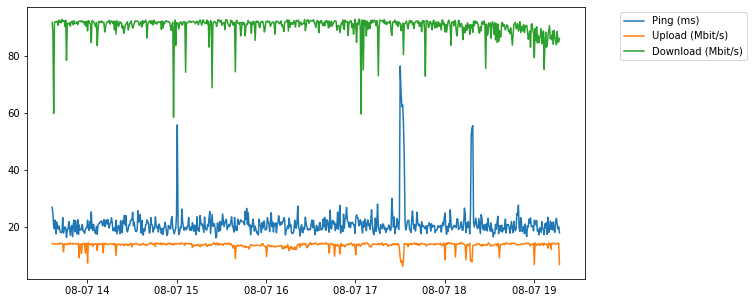

In [23]:
#Inicializa figura
fig, ax = plt.subplots(figsize=(10, 5))

# Plot three curves of different colors
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

# Insert a legend outside of the main plot
ax.legend(bbox_to_anchor=(1.3, 1.))
plt.show()


In [44]:
# Record the values you consider acceptable in these variables
# Examples:
acceptable_upload = 13 #Mbit/s
acceptable_download = 88 #Mbit/s
acceptable_ping = 20 #ms

**a) Trace histogramas por velocidad de descarga, velocidad de carga y tiempo de ping. En cada uno de estos gráficos, utilice una línea vertical para indicar el valor que considera aceptable para cada medición**

**Paso 3: Comparación con expectativas**

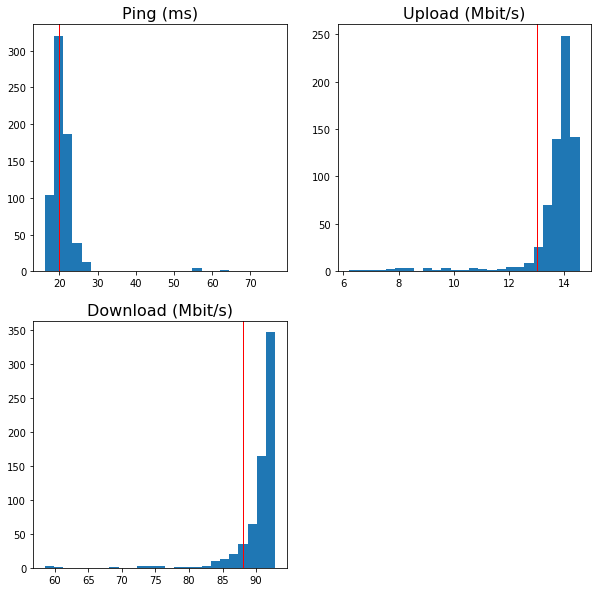

In [45]:
 # Initialize figure
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# plot ping speed
ax[0][0].hist(df_clean['Ping (ms)'], 25)
    
# plot acceptable ping 
ax[0][0].axvline(acceptable_ping, color='red', linewidth=1)
ax[0][0].set_title('Ping (ms)', fontsize=16)
    
# plot upload speed
ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25)
# plot acceptable upload
ax[0][1].axvline(acceptable_upload, color='red', linewidth=1)
ax[0][1].set_title('Upload (Mbit/s)', fontsize=16)
   
# plot download speed
ax[1][0].hist(df_clean['Download (Mbit/s)'], 25)
# plot acceptable download
ax[1][0].axvline(acceptable_download, color='red', linewidth=1)
ax[1][0].set_title('Download (Mbit/s)', fontsize=16)
ax[1][1].set_visible(False)    


**b) Calcule el promedio y la desviación estándar de la velocidad de descarga, la velocidad de carga y el tiempo de ping, y calcule cuántas desviaciones estándar separan a los valores aceptables de los valores promedio**

In [46]:
# compute the means and the standard deviations of the various measures
means = df_clean.min()
stands = df_clean.max()

# this makes the results look better with labels
quote_ping = (means['Ping (ms)'], stands['Ping (ms)'])
quote_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
quote_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

# print the results
print('Promedio ping time: {} ± {} ms'.format(*quote_ping))
print('Promedio download speed: {} ± {} ms'.format(*quote_download))
print ('Promedio upload speed: {} ± {} ms'.format(*quote_upload) )
# blank line
print('')
print('Distancia entre la velocidad de ping aceptable y la media: {:.2f} standard deviations'.format((quote_ping[0]-acceptable_ping)/quote_ping[1]))
print('Distancia entre la velocidad de descarga aceptable y la media: {:.2f} standard deviations '.format((quote_download[0]-acceptable_download)/quote_download[1])) 
print('Distancia entre la velocidad de carga aceptable y la media: {:.2f} standard deviations '.format((quote_upload[0]-acceptable_upload)/quote_upload[1]))

Promedio ping time: 16.167 ± 76.528 ms
Promedio download speed: 58.48 ± 92.87 ms
Promedio upload speed: 6.21 ± 14.55 ms

Distancia entre la velocidad de ping aceptable y la media: -0.05 standard deviations
Distancia entre la velocidad de descarga aceptable y la media: -0.32 standard deviations 
Distancia entre la velocidad de carga aceptable y la media: -0.47 standard deviations 


<br>

**C) Calcule el porcentaje de mediciones de velocidad de descarga que no son aceptables. Repita este cálculo para la velocidad de carga y ping**

In [48]:


print('{:.2f}% de las mediciones son inferiores a la velocidad de descarga aceptable'.format(np.sum(df_clean['Download (Mbit/s)']<acceptable_download)/float(len(df_clean))*100))

print('{:.2f}% de las mediciones son inferiores a la velocidad de carga aceptable.'.format(np.sum(df_clean['Upload (Mbit/s)']<acceptable_upload)/float(len(df_clean))*100))

print('{:.2f}% de las mediciones son inferiores a la velocidad de ping aceptable.'.format(np.sum(df_clean['Ping (ms)']<acceptable_ping)/float(len(df_clean))*100))




10.86% de las mediciones son inferiores a la velocidad de descarga aceptable
7.89% de las mediciones son inferiores a la velocidad de carga aceptable.
42.86% de las mediciones son inferiores a la velocidad de ping aceptable.


<br>

**d) Busque el porcentaje de mediciones que no satisface sus criterios de servicio aceptable en las tres cantidades**

In [49]:
all_three = np.sum((df_clean['Ping (ms)']<acceptable_ping) & (df_clean['Download (Mbit/s)']<acceptable_download) & (df_clean['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables en tres casos.'.format(all_three/float(len(df_clean))*100))

0.60% de las mediciones no son aceptables en tres casos.


<br>

**e) Busque el porcentaje de mediciones que no satisface sus criterios de servicio aceptable en dos de las tres cantidades**

In [50]:
ping_upload = np.sum((df_clean['Ping (ms)']<acceptable_ping) & (df_clean['Upload (Mbit/s)']<acceptable_upload))
print('{:.2f}% de las mediciones no son aceptables para ping y carga'.format(ping_upload/float(len(df_clean))*100))

ping_download = np.sum((df_clean['Ping (ms)']<acceptable_ping) & (df_clean['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para ping y descarga '.format(ping_download/float(len(df_clean))*100))

upload_download = np.sum((df_clean['Upload (Mbit/s)']<acceptable_upload) & (df_clean['Download (Mbit/s)']<acceptable_download))
print('{:.2f}% de las mediciones no son aceptables para carga y descarga'.format(upload_download/float(len(df_clean))*100))

2.98% de las mediciones no son aceptables para ping y carga
4.61% de las mediciones no son aceptables para ping y descarga 
1.34% de las mediciones no son aceptables para carga y descarga
